# Advanced Distributions
## By James Cheng and Sarang Deshpande (SAAS)

## Table of Contents
1. [Characterizations of Continuous Random Variables](#characterizations)
     1. [Cumulative Distribution Function (CDF)](#cdf)
     2. [Probability Density Function (PDF)](#pdf)
2. [Normal Distribution](#normal)
3. [Student's $t$-distribution](#t)
4. [Poisson Processes and Associated Distributions](#pp_and_dists)
    1. [Poisson Distribution](#poiss)
    2. [Exponential Distribution](#expo)
    3. [Poisson Processes](#pp)
    4. [Erlang Distribution](#erlang)
5. [Gamma Distribution](#gamma)
6. [Chi-Squared Distribution](#chi)
7. [Beta Distribution](#beta)
8. [Conclusion](#conclusion)

Today, we'll be discussing "advanced" distributions that you may have not seen before! As a disclaimer, much of the content in this notebook is adapted from Data 140 and EECS 126, so please check out those classes if you find any of this interesting!

In [3]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import matplotlib.pyplot as plt

<a id='characterizations'></a>
## Characterizations of Continuous Random Variables

<a id='cdf'></a>
### Cumulative Distribution Function (CDF)

$$F_{X}(x) := P(X \leq x) = P(X \sim (-\infty, x])$$

The CDF is the probability that a random variable's distribution is less than some value $x$. Here are three properties of the CDF:
1. Non-decreasing: for any $x$, $y \in \mathbb{R}$ such that $x \leq y$, we have $F_{X}(x) \leq F_{X}(y)$.
2. Right-continuity: for any $x \in \mathbb{R}$, $\lim_{x \to a^{+}} F_X(x) = F_{X}(a)$
3. Normalization: $lim_{x \to \infty} F_X(x) = 1$ and $lim_{x \to -\infty} F_X(x) = 0$  
  
In other words, non-decreasing means the CDF is never decreasing in value. Right-continuity means when we take the right-hand limit at a point, we approach the function evaluated at that point. Normalization means the CDF approaches 1 and begins at 0. This makes sense because $P(X \leq \infty) = 1$ and $P(X \leq -\infty) = 0$. Note that CDF has the same definition for both discrete and continuous distributions.  
With this definition, we note that
$$P(X \in [a, b]) = F_X(b) - F_X(a)$$

### Survival Function (CCDF)
The complement of the CDF is the CCDF, or survival function. This function describes $P(X > x)$, and is defined as $$P(X>x) = 1 - F_X(x)$$

This characterization is especially relevant when discussing exponential random variables.

However, we still don't have an analog of PMF $P(X=x)$ for continuous distributions, which we will now see.

<a id='pdf'></a>
### Probability Density Function (PDF)

$$f_X(x) = \frac{d}{dx}F_X(x)$$
The PDF is the probability per unit length of being at a value $x$ and can be defined as the derivative of the CDF at $x$. Every PDF satisfies the following properties:
1. Nonnegativity: $f_X(x) \geq 0$, which follows from non-decreasingness of CDF.
2. Normalization: $\int_{-\infty}^{\infty} f_X(x) = 1$, which follows from normalization of CDF or CDF approaching $1$ as $x \to \infty$.  

It is important to note that the PDF is not the same thing as $P(X = x) = 0$ for a continuous random variable $X$. Instead, it is interpreted as the probability per unit length, or $P(X \in [x, x+dx])$ for some small $dx$.

<a id='normal'></a>
## Normal Distribution  
Let's start by exploring the normal distribution. As you know, the normal distribution is used in a wide variety of statistics applications. 
### Normal Distribution PDF

A random variable X that follows a $\mathcal{N}(\mu, \sigma^2)$ distribution with mean $\mu$ and variance $\sigma^2$ has the following probability density function (PDF):  

$$  
f_X(x) ~ = ~ \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}
$$ 

### Expectation and Variance:

$$E[X] = \mu$$

$$Var(X) = \sigma^2$$

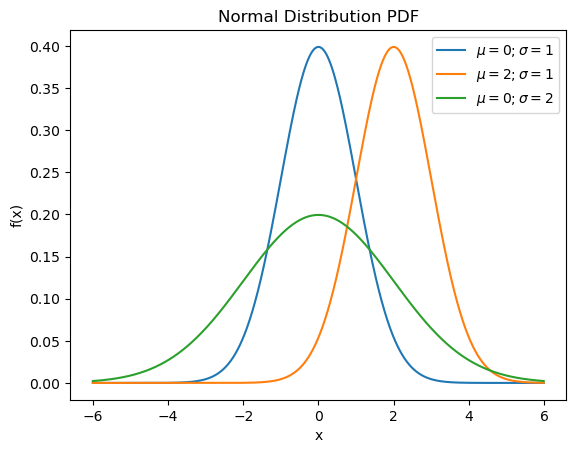

In [4]:
# Normal Distribution PDF for different mean and standard deviation combinations. 
x = np.arange(-6, 6, 0.01)
plt.plot(x, stats.norm.pdf(x, 0, 1), label='$\mu=0; \sigma=1$')
plt.plot(x, stats.norm.pdf(x, 2, 1), label='$\mu=2; \sigma=1$')
plt.plot(x, stats.norm.pdf(x, 0, 2), label='$\mu=0; \sigma=2$')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Normal Distribution PDF')
plt.legend()
plt.show()

One convenient characteristic of the normal distribution is the 68 - 95 - 99.7 rule.
<img src='AdvancedDistributionsImages/68-95-997-rule.png' width=500px>  
Let's test out this rule on the standard normal distribution. 

`stats.norm(mu,sigma).cdf(x)` will give you the CDF of x where all x are follow a normal distribution with mean of $\mu$ and standard deviation of $\sigma$. Note that the function takes in the standard deviation $\sigma$, not variance $\sigma^2$. A CDF is the the probability that x is less than or equal to a value, or $P(X \leq x)$ for any random variable $X$.

What are the parameters for a standard normal distribution? Mean of 0 and standard deviation of 1.<br>
What does it mean when I type in `stats.norm(0,1).cdf(0)`? What should the answer be?

In [5]:
# Guess what the below cell should return!
stats.norm(0,1).cdf(0)

0.5

Now, let's test out the 68-95-99.7 rule:

In [6]:
prob_one_sd_away = stats.norm(0,1).cdf(1) - stats.norm(0, 1).cdf(-1)
prob_two_sd_away = stats.norm(0,1).cdf(2) - stats.norm(0, 1).cdf(-2)
prob_three_sd_away = stats.norm(0,1).cdf(3) - stats.norm(0, 1).cdf(-3)

print(f"Probability that X is one standard deviation away from the mean: {prob_one_sd_away}")
print(f"Probability that X is two standard deviations away from the mean: {prob_two_sd_away}")
print(f"Probability that X is three standard deviations away from the mean: {prob_three_sd_away}")

Probability that X is one standard deviation away from the mean: 0.6826894921370859
Probability that X is two standard deviations away from the mean: 0.9544997361036416
Probability that X is three standard deviations away from the mean: 0.9973002039367398


<a id='t'></a>
## Student's $t$-distribution
### Overview
The Student's $t$-distribution ($t$-distribution) is used when estimating the mean of a normally distributed population when the sample size is small and population standard deviation is unknown. You may have used it before to conduct a $t$-test to assess the statistical significance between two sample means or to construct confidence intervals of the difference between two population means.  

The $t$-distribution can be seen as a more conservative form of the normal distribution in putting more weight on the tails and less weight on the mean:

<img src='AdvancedDistributionsImages/t-vs-z-distributions.png' width=500px>

Here is how $t$-distributions arise from sampling from a normally distributed population:  
Let $X_1, X_2, X_3, ... \sim_{iid} \mathcal{N}(\mu, \sigma^2)$, or have a sample size of $n$ sampled from a population with estimated mean $\mu$ and variance $\sigma^2$. Let the sample mean be 
$$\overline X = \frac{1}{n} \sum_{i=1}^{n} X_i$$
and the Bessel-corrected (note the $\frac{1}{n-1}$, which makes it an unbiased estimator) sample variance be  
$$S^2 = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \overline X)^2$$
Then, the standardized random variable  
$$\frac{\overline X - \mu}{\sigma / \sqrt{n}}$$
follows a standard normal distribution with mean $\mu$ and variance $1$ (it is standardized by subtracting the mean and divide by the standard deviation of $\overline X$). Then, the random variable 
$$\frac{\overline X - \mu}{S / \sqrt{n}}$$
has a $t$-distribution with $n-1$ degrees of freedom. Now that we replaced population standard deviation $\sigma$ with sample standard deviation $S$, population mean $\mu$ is our only unknown variable and we can create confidence intervals for $\mu$.

### $t$-distribution vs Normal distribution
Let's explore the relationship between the $t$-distribution and the normal distribution further. We mentioned earlier that the $t$-distribution is used when the population is normally distributed and our sample size is small. The variance of the distribution is dependent on the degrees of freedom $n-1$. What if our sample size increases?  
To explore, we will make use of the scipy's $t$-distribution PDF: **stats.t.pdf(x, df, loc=0, scale=1)**. x is the value we're interested in PDF $f_X(x)$, df is the degrees of freedom, loc is our shift, and scale is how much we want to scale the distribution.

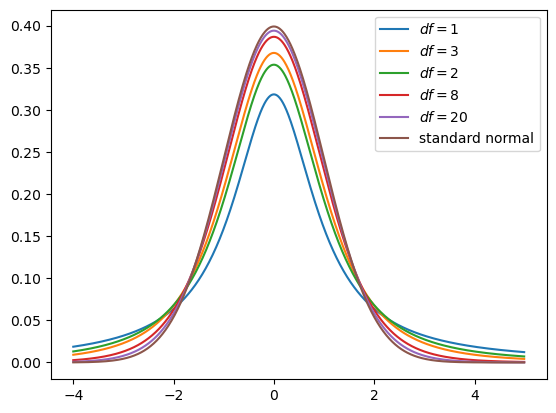

In [28]:
# k is the k-value for the PDF f_X(k)
k = np.arange(-4, 5, 0.01)

# We iterate through different values of degrees of freedom df.
for df in np.array([1, 3, 2, 8, 20]):
    # calculate the PDF
    p = stats.t.pdf(k, df, loc=0, scale=1)
    plt.plot(k, p, label=f'$df = {df}$')
# add standard normal PDF
p_norm = stats.norm.pdf(k)
plt.plot(k, p_norm, label=f'standard normal')
plt.legend(loc='best')
plt.show()

As you can see, as the degrees of freedom increases, we get closer and closer to the standard normal distribution PDF! As our sample size surpasses 30, the $t$-distribution is roughly the normal distribution.

<a id='pp_and_dists'></a>
## Poisson Processes and its Associated Distributions

<a id='poiss'></a>
### Poisson Distribution
#### Overview
Poisson random variables describe the probability of an event happening a certain number of times within a time period or space. The rate at which events occur must be constant, and one event's occurrence cannot impact another event's occurrence: the events must be independent. Typically, the time period or space is very large, and the probability is very low. 

#### PMF
The Poisson random variable $X \sim Poisson(\lambda)$ is a discrete random variable with parameter $\lambda$ and PMF  
$$p_{X}(k) = e^{-\lambda} \frac{\lambda^k}{k!}$$ with $k = 0, 1, 2, ...$. The parameter $\lambda$ can be seen as the mean number of events that occur. A Poisson RV is essentially a binomial random variable with a very large $n$ and very small $p$.  

**Example**: Let $X$ be the number of defective tires in a car factory with $n=1,000,000$ total tires with each tire having a probability $p = 0.0001$ or $0.01\%$ of being defective. Then, $X$ is a binomial random variable, but since the probability $p$ of a defective tire is very small, $X$ is well modeled by a Poisson PMF.  

In particular, the Poisson PMF with parameter $\lambda$ is a good approximation of a binomial random random variable with parameters $n$ and $p$:  
$$e^{-\lambda} \frac{\lambda^k}{k!} \approx \binom{n}{k} p^k (1-p)^{n-k}$$ assuming $\lambda = np$.  

#### Expectation and Variance:
For $X \sim Poisson(\lambda)$,  
$$\mathbb{E}[X] = \lambda$$ 
$$Var(X) = \lambda$$ 

Under the scipy package, we have the scipy.stats.poisson object that describes a Poisson distribution. To get the PMF, we have **stats.poisson.pmf(k, mu, loc=0)**. k is the value we are interested in $P(X=k)$. mu is the parameter lambda for our Poisson distribution. loc describes how much we want to shift the distribution by; typically we keep loc at the default value of 0. Here is a use of that function to see how the Poisson PMF changes for different values of $\lambda$.

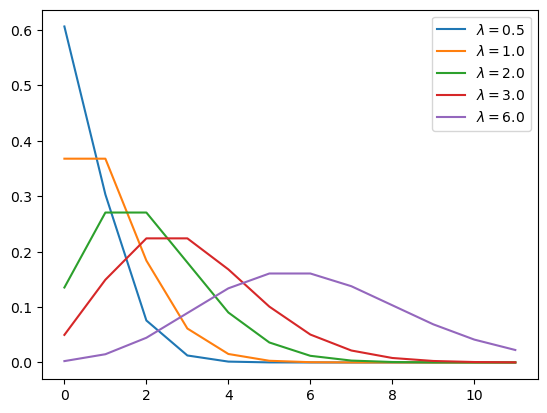

In [29]:
# k is the k-value for the PMF in P(X = k)
k = np.arange(12)

# We iterate through different values of parameter lambda
for lam in np.array([0.5, 1, 2, 3, 6]):
    # calculate the PMF across all values of k above
    p = stats.poisson.pmf(k, lam, loc=0)
    plt.plot(k, p, label=f'$\lambda = {lam}$')
plt.legend(loc='best')
plt.show()

**Question**: What patterns do you notice as $\lambda$ increases? Intuitively, why do these patterns occur?

**Answer:** As $\lambda$ increases, the mean number of events that occur increases. This is demonstrated in the graph by the curves shifting to the right with the centers of the probability mass shifting right as well because the mean number of events increases.

To get the CDF, we have **stats.poisson.cdf(k, mu, loc=0)**:

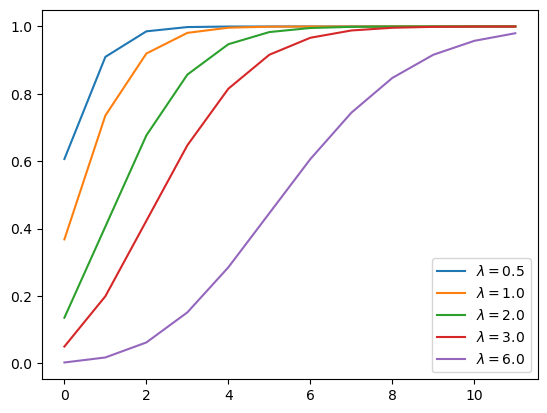

In [9]:
# k is the k-value for the CDF, or P(X <= k)
k = np.arange(12)

# We iterate through different values of parameter lambda
for lam in np.array([0.5, 1, 2, 3, 6]):
    # calculate the CDF
    p = stats.poisson.cdf(k, lam, loc=0)
    plt.plot(k, p, label=f'$\lambda = {lam}$')
plt.legend(loc='best')
plt.show()

**Question**: What patterns do you notice as $\lambda$ increases? Intuitively, why do these patterns occur?

**Answer:** Similar to before, as $\lambda$ decreases, the mean number of events that occur decreases. Therefore, for lower values of $\lambda$, it is much more likely for the random variable to be less than some value.

**Exercise**: Let's expand on our example above: let $X$ be the number of defective tires in a car factory with $n=1,000,000$ total tires with each tire having a probability $p = 0.0001$ or $0.01\%$ of being defective. Then, $X$ is a binomial random variable, but since the probability $p$ of a defective tire is very small, $X$ is well modeled by a Poisson PMF.  
1. What is the parameter $\lambda$ for the Poisson RV?
2. What is the probability that there are less than or equal to 90 defective tires?

Probability of less than or equal to 90 defective tires: 0.17138511932176148


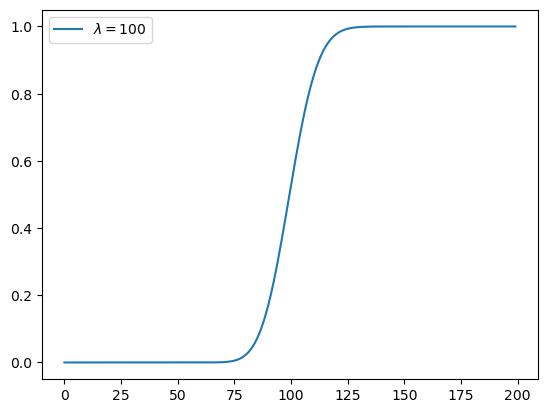

In [10]:
# lambda = np = 1,000,000 * 0.0001 = 100
lam = 100 # lambda
print(f"Probability of less than or equal to 90 defective tires: {stats.poisson.cdf(90, lam, loc=0)}")

# observing CDF across all values from k=0 to k=199
k = np.arange(200)
p = stats.poisson.cdf(k, lam, loc=0)
plt.plot(k, p, label=f'$\lambda = {lam}$')
plt.legend(loc='best')
plt.show()

<a id='expo'></a>
### Exponential Distribution

#### Overview
Exponential distributions typically describe the waiting time for a single event to occur, so it is analogous to the Geometric Distribution for discrete random variables.  

#### PDF, CDF,  and Survival Function
The exponential random variable is continuous which has a PDF of  
$$ f_X(x) =   \left\{
\begin{array}{ll}
      \lambda e^{-\lambda x}, & x \geq 0 \\
      0, & otherwise
\end{array} 
\right.  $$

The CDF is 
$$F_X(x) = {1-e^{-\lambda x}}$$
Therefore, the CCDF or survival function is $$e^{-\lambda x}$$


**Example**: Let $X$ be the wait time for the next bus to arrive, and the bus always seems to arrive in 12 minutes on average. Since time is continuous and we are describing a wait time, $X \sim Expo(\frac{1}{12})$ where $\lambda=\frac{1}{12}$ is the rate parameter because one bus arrives every 12 minutes on average.  

#### Expectation and Variance:
For $X \sim Expo(\lambda)$,  
$$\mathbb{E}[X] = \frac{1}{\lambda}$$
$$Var(X) = \frac{1}{\lambda^2}$$  

**Memoryless Property**:
One key property of the Exponential is that it is memoryless (so is Geometric)! Now what does that mean? Let's put it mathematically first, for $X \sim Expo(\lambda)$:
$$P(X > t + s | X > t) = P(X > s)$$
Taking a look at the conditional part of the probability, we know that we will take more than time $t$ for the arrival/some event to occur. The probability that it will take more than $t+s$ time to occur (survival probability) is the same probability that it will take greater than $s$ time to occur. In essence, we "forgot" about the fact that more than $t$ time has already passed - it is as if we started from the beginning again! That is why it is referred to as the memoryless property.  

We can use scipy's **stats.expon.pdf(x, loc=0, scale=1)** to find the PDF of an exponential distribution. Similar to before, x is is the value we are interested in, or the small $x$ in $f_X(x)$. loc is how much we want to shift by. Scale represents $\frac{1}{\lambda}$, and it is how much we scale the exponential distribution by.

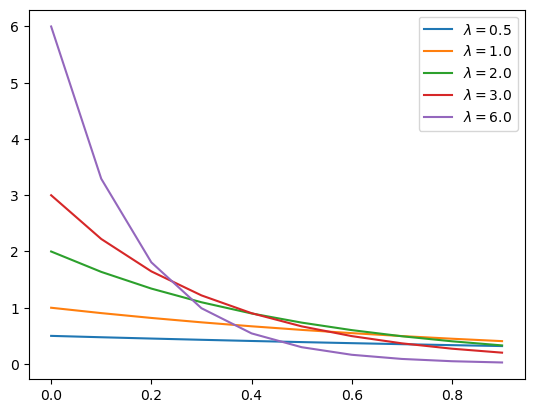

In [11]:
# k is the k-value for the PDF f_X(k)
k = np.arange(0, 1, 0.1)

# We iterate through different values of parameter lambda
for lam in np.array([0.5, 1, 2, 3, 6]):
    # calculate the PDF
    p = stats.expon.pdf(k, loc=0, scale=1/lam)
    plt.plot(k, p, label=f'$\lambda = {lam}$')
plt.legend(loc='best')
plt.show()

**Question**: What patterns do you notice as $\lambda$ increases? Intuitively, why do these patterns occur?

**Answer**: As $\lambda$ increases, our rate is increasing. Therefore, the probability (per unit length) at smaller values is very high because it is very likely for the event to have occurred if the rate is high.

The CDF function for the exponential is very similar: **stats.expon.cdf(x, loc=0, scale=1)**

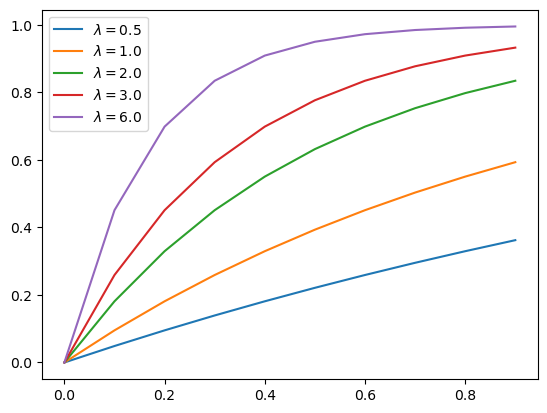

In [12]:
# k is the k-value for the CDF, or P(X <= k)
k = np.arange(0, 1, 0.1)

# We iterate through different values of parameter lambda
for lam in np.array([0.5, 1, 2, 3, 6]):
    # calculate the CDF
    p = stats.expon.cdf(k, loc=0, scale=1/lam)
    plt.plot(k, p, label=f'$\lambda = {lam}$')
plt.legend(loc='best')
plt.show()

**Question**: What patterns do you notice as $\lambda$ increases? Intuitively, why do these patterns occur?

**Answer**: Similar to before, as $\lambda$ increases, our rate is increasing. Therefore, the probability that an event occurred before some small value is very high because it is very likely for the event to have occurred by then if the rate is high.

<a id='pp'></a>
### Poisson Processes
With the Poisson and Exponential distributions, we can begin to look at the Poisson Process, which is a type of random process. What is a random process? So far, we've been looking at random variables individually. But what if we want to observe a sequence of random variables, which is how many observable processes work in the real world? For example, a sequence of daily stock prices or sequence of failure times of a machine both need multiple random variables.  

Here is a definition of the Poisson process according to EECS 126 notes:  
**Definition**: *Fix some $\lambda > 0$ and sample interarrival times $S_1, S_2, S_3, ... \sim_{iid} Exp(\lambda)$. For each $n \geq 1$ define $T_n = \sum_{j = 1}^{n} S_j$ for $n \geq 1$. The function $N(t) = max\{n \geq 0: T_n \leq t\}$ represents the number of arrivals at time t. We call the sequence $\{N(t)\}_{t\geq 0}$ a Poisson process with rate $\lambda$. The distribution of such processes is denoted $PP(\lambda)$.*  

Here is a graph that relates $t$ (time) and $N_t$ (number of arrivals).

<img src='AdvancedDistributionsImages/PoissonProcess.png' width=500px>

Using the same bus example from the exponential distribution section, the time between the $i-1$st bus and $i$th bus is the interarrival time $S_i$. The $i$th bus comes after $T_i$ time as elapsed. The Poisson process $N(t)$ counts the number of buses that have arrived by time $t$.  

Oftentimes, we may want to observe the number of arrivals in an arbitrary range of time that doesn't start at $0$. We can introduce some new notation for that:  
**Definition**: For Poisson process $PP(\lambda)$, we define $N(t_1, t_2) := N(t_2) - N(t_1)$ for $t_2 \geq t_1$ to be the number of arrivals in the interval $[t_1, t_2]$.

Where does the "Poisson" in Poisson processes comes from?
For a Poisson process $\{N(t)\}_{t \geq 0} \sim PP(\lambda)$, we have $N(t) \sim Poisson(\lambda t)$, or more explicitly the PMF is  
$$P(N_t = n) = \frac{(\lambda t)^n e^{-\lambda t}}{n!}$$
In other words, the distribution of the number of arrivals by some time $t$ follows a Poisson distribution.

**Exercise**: Pierre catches fish according to a $PP(\lambda=0.6 fish/hr)$. If he catches at least one fish in the first two hours, he quits. Else, he continues beyond 2 hours until he has caught his first fish.
1. What is the probability that Pierre fishes for more than 2 hours?


**Answer**: Pierre fishes for more than 2 hours only if he did not catch a single fish in the first two hours, and this occurs with probability $P(N_2 = 0) = e^{-1.2}$

2. What is the probability that Pierre catches at least 2 fish?

**Answer**: Pierre catches at least 2 fish only if he catches at least 2 fish within the first two hours, because if he spends more than two hours he can only catch at most 1 fish. Therefore, we are interested in the probability that Pierre catches at least 2 fish in the first two hours. We use the complement rule because $P($at least one fish in first 2 hours$)$ is equal to $1-P($0 fish in first two hours$) - P($1 fish in first two hours$) = 1 - P(N_2 = 0) - P(N_2 = 1) = 1-e^{-1.2}-1.2e^{-1.2}$.

3. What is the expected number of fish caught by Pierre?

**Answer**: Note that $\mathbb{E}[$# fish caught$] = \mathbb{E}[$# fish caught in $(0, 2)] + \mathbb{E}[$# fish caught in $(2, \infty)]$. We proceed to use linearity of expectation:  
$\mathbb{E}[Poisson(1.2)] + 1\cdot e^{-1.2} = 1.2+e^{-1.2}$. $\mathbb{E}[$# fish caught in $(2, \infty)] = 1\cdot e^{-1.2}$ because we can only have $1$ fish caught in $(2, \infty)$, and the probability of that occurring is the probability of fihsing fore more than 2 hours, which is $e^{-1.2}$ from part 1 of this exercise.

4. What is the expected time spent fishing given that Pierre has already spent more than 4 hours?

**Answer**: Since we have already spent more than 4 hours, we are waiting for our first fish to be caught, and this time is distributed exponentially since we are observing a Poisson Process. By the memoryless property, the fact that we have already spent more than 4 hours does not impact our distribution - it is as if we started from $t=2$ again. Therefore, the amount of time for our first fish to be caught is $Expo(\frac{0.6})$.  
$\mathbb{E}[$fishing time$ | T > 4] = 4 + \mathbb{E}[Expo(0.6)] = 4 + \frac{1}{0.6} = 5 \frac{2}{3}$ hours.

<a id='erlang'></a>
### Erlang Distribution
#### Overview
We know that the sample interarrival times $S_i$ are distributed according to $Expo(\lambda)$, but what are the distributions of the the arrival times $T_k$? First, note that each $T_k$ is a sum of the i.i.d. $Expo(\lambda)$ random variables. The sum of the i.i.d. exponential random variables results in the Erlang distribution, denoted $Erlang(k;\lambda)$.  

#### PDF and CDF
If we let $T_k$ be the arrival time for the $k$th arrival for a Poisson process $PP(\lambda)$, then the PDF for an Erlang distribution is
$$f_{T_k}(t) = \frac{\lambda^k t^{k-1} e^{-\lambda t}}{(k-1)!}$$
The CDF is 
$$1 - \sum_{n=0}^{k-1} \frac{1}{n!} e^{-\lambda x} (\lambda x)^n$$

#### Expectation and Variance:
For $X \sim Erlang(k;\lambda)$,
$$\mathbb{E}[X] = \frac{k}{\lambda}$$
$$Var(X) = \frac{k}{\lambda^2}$$
These can be verified using the mean and variance of exponential random variables, linearity of expectation, and the fact that we are summing over i.i.d. exponential random variables.

Scipy's PDF function for the Erlang distribution is **stats.erlang.pdf(x, a, loc=0, scale=1)**. x is the the arrival time (t in our PDF above) and a is which arrival we're interested in (kth arrival; k in our PDF above). loc and scale are the same as before: loc is how much we are shifting by and scale =$\frac{1}{\lambda}$.

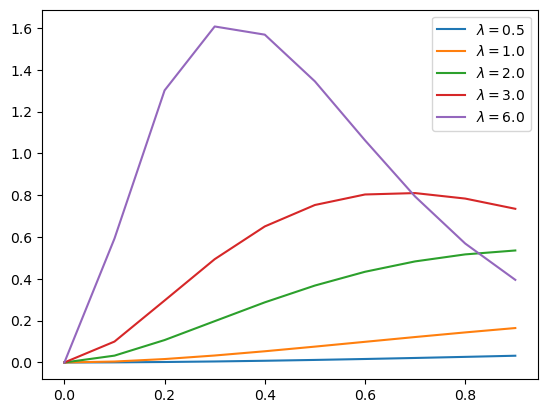

In [13]:
# t is the t-value for the PDF f_{T_k}(t)
t = np.arange(0, 1, 0.1)

# We iterate through different values of parameter lambda.
# Here, we set a=3, which means we are interested in the distribution of the k=3 or third arrival.
for lam in np.array([0.5, 1, 2, 3, 6]):
    # calculate the PDFb
    p = stats.erlang.pdf(t, a=3, loc=0, scale=1/lam)
    plt.plot(k, p, label=f'$\lambda = {lam}$')
plt.legend(loc='best')
plt.show()

**Question**: What patterns do you notice as $\lambda$ increases? Intuitively, why do these patterns occur?

**Answer**: As $\lambda$ increases, our rate increases. Therefore, the amount of time it takes for our $k$th arrival would be lower for high $\lambda$ because our rate is higher.

Similarly, the CDF function for the Erlang distribution is **stats.erlang.cdf(x, a, loc=0, scale=1)**:

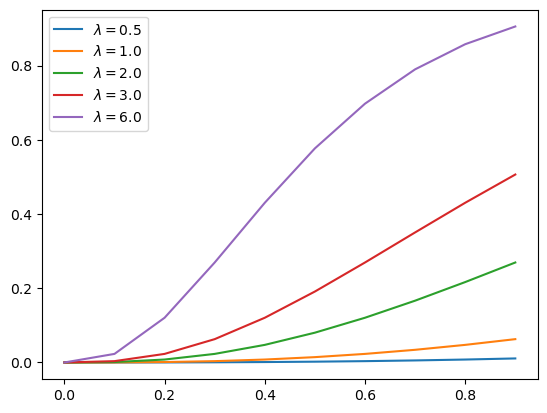

In [14]:
# t is the t-value for the CDF F_{T_k}(t)
t = np.arange(0, 1, 0.1)

# We iterate through different values of parameter lambda.
# Here, we set a=3, which means we are interested in the distribution of the k=3 or third arrival.
for lam in np.array([0.5, 1, 2, 3, 6]):
    # calculate the CDF
    p = stats.erlang.cdf(t, a=3, loc=0, scale=1/lam)
    plt.plot(k, p, label=f'$\lambda = {lam}$')
plt.legend(loc='best')
plt.show()

**Question**: What patterns do you notice as $\lambda$ increases? Intuitively, why do these patterns occur?

**Answer**: Similar to before, as $\lambda$ increases, our rate increases. Therefore, the probability that it takes for our $k$th arrival to be less than some time $t$ is going to be higher for a higher rate.

<a id='gamma'></a>
## Gamma Distribution

Next, we will explore the Gamma Distribution.

### Gamma Distribution Overview

The Gamma Distribution is another distribution with many applications. It is essentially an extension of the Erlang distribution where the shape parameter no longer has to take on integer values. As a result, it's most common application is in modeling wait times of independent events occuring at a constant average rate.

### Gamma Distribution PDF

A random variable X that follows a $Gamma(r, \lambda)$ distribution has the following probability density function (PDF):  

$$
f_X(x) ~ = ~ \frac{\lambda^r}{\Gamma(r)} x^{r-1}e^{-\lambda x}, ~~~~~ x \ge 0
$$

### Gamma Function

You may notice a strange function $\Gamma(r)$ present in the gamma distribution PDF. This function is called the gamma function and is equal to the following:

$$
\Gamma(r) ~ = ~ \int_0^\infty x^{r-1}e^{-x} dx
$$

The gamma function has applications to various realms of mathematics and statistics. It can be thought of as an extension of the factorial function to the real number domain. In fact, for any positive integer input, $\Gamma(r) ~ = ~ (r-1)!$  

### Gamma Distribution Parameters

Looking back at the gamma distribution PDF, there are two parameters that define the distribution, r and $\lambda$. Both parameters must be positive.

#### Shape Parameter
r is considered the shape parameter. We noted earlier that an important application of this distribution is the wait time until some number of independent events occurs. The shape parameter is equal to the number of events we are waiting to occur in this example.

#### Scale Parameter
$\lambda$ is considered the scale parameter. The scale parameter is equal to the average rate at which events occur.

### Expectation and Variance:

$$E[X] = \frac{r}{\lambda}$$

$$Var(X) = \frac{r}{\lambda^2}$$

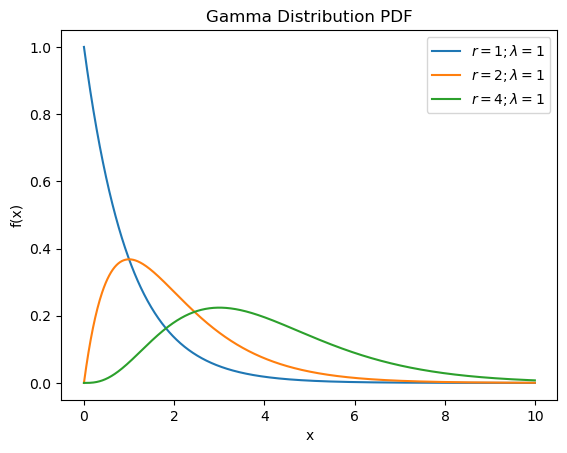

In [15]:
#Gamma Distribution PDFs for differing shape parameter but constant scale parameter

x = np.arange(0, 10, 0.01)
plt.plot(x, stats.gamma.pdf(x, 1, scale=1), label='$r=1; \lambda=1$')
plt.plot(x, stats.gamma.pdf(x, 2, scale=1), label='$r=2; \lambda=1$')
plt.plot(x, stats.gamma.pdf(x, 4, scale=1), label='$r=4; \lambda=1$')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gamma Distribution PDF')
plt.legend()
plt.show()

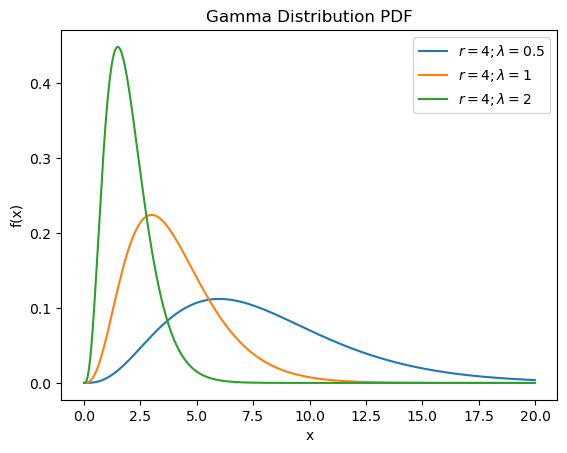

In [16]:
#Gamma Distribution PDFs for differing scale parameter but constant shape parameter

x = np.arange(0, 20, 0.01)
plt.plot(x, stats.gamma.pdf(x, 4, scale=2), label='$r=4; \lambda=0.5$')
plt.plot(x, stats.gamma.pdf(x, 4, scale=1), label='$r=4; \lambda=1$')
plt.plot(x, stats.gamma.pdf(x, 4, scale=0.5), label='$r=4; \lambda=2$')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gamma Distribution PDF')
plt.legend()
plt.show()

### Special Cases of the Gamma Distribution

The gamma distribution is closely related to many other distributions. Here are a few important special cases:



$Exponential(\lambda) = Gamma(1, \lambda)$

If $X$ ~ $Normal(0, 1)$ then $X^2$ ~ $Gamma(1/2, 1/2)$ 

<a id='chi'></a>

## Chi-Squared Distribution

### Chi-Squared Distribution Overview

The chi-squared distribution is used most commonly in statistical inference problems. The distribution itself represents the distribution of a sum of the squares of independent standard normal random variables.

It is relevant to hypothesis testing/confidence interval generation and is also used to test the goodness of fit for a model to a given distribution of data. An important use case of this distribution is to test whether or not two sets of data series are independent or not.

### Chi-Squared Distribution PDF

A random variable X that follows a chi-squared distribution with n degrees of freedom has the following probability density function (PDF):

$$
f_X(x) ~ = ~ \frac{\frac{1}{2}^{\frac{n}{2}}}{\Gamma(\frac{n}{2})} x^{\frac{n}{2} - 1} e^{-\frac{1}{2}x}, ~~~~ x > 0
$$

You will notice that this is equivalent to the $Gamma(\frac{n}{2}, \frac{1}{2})$ distribution.

### Chi-Squared Distribution Parameter

The parameter n in the chi-squared distribution represents the number of degrees of freedom. Recall that the chi-squared distribution represents the sum of the squared of independent standard normal random variables. The parameter n determines the number of variables being summed.

### Expectation and Variance:

$$E[X] = n$$

$$Var(X) = \sqrt{2n}$$

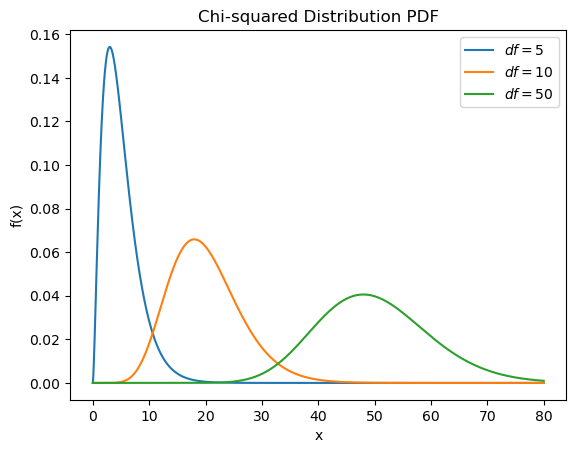

In [17]:
#Chi-squared Distribution PDFs for different degrees of freedom

x = np.arange(0, 80, 0.01)
plt.plot(x, stats.chi2.pdf(x, df=5), label='$df=5$')
plt.plot(x, stats.chi2.pdf(x, df=20, scale=1), label='$df=10$')
plt.plot(x, stats.chi2.pdf(x, df=50), label='$df=50$')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Chi-squared Distribution PDF')
plt.legend()
plt.show()

## Chi-Squared Goodness of Fit Test
As noted earler, the Chi-Squared distribution can be used to test how well a model that we have fits our data. We are going to explore that in more detail.

Let's say we are running a clothing store and we want to analyze the colors of the shirts that customers tend to buy from our search. We collect data on the number of shirts bought by each customer in a given week. The data is shown in the table below.

Referenced: https://www.scribbr.com/statistics/chi-square-distributions/

In [30]:
shirts = pd.DataFrame({'Color': ['Red', 'Gray', 'Yellow', 'Pink', 'Black', 'White', 'Blue'],
                   'Sales': [42, 57, 28, 51, 50, 63, 59]}).set_index('Color')
shirts

,Sales
Color,
Red,42
Gray,57
Yellow,28
Pink,51
Black,50
White,63
Blue,59


Let's say that we assume our customers don't really prefer any color over another. In other words, our "model" tells us that each color should have an equal number of sales. Since a total of 350 shirts were sold and there are 7 colors, this means that we anticipate 50 shirts being sold of each color.

In [19]:
shirts['Expected Sales'] = 50
shirts

,Sales,Expected Sales
Color,,
Red,42,50
Gray,57,50
Yellow,28,50
Pink,51,50
Black,50,50
White,63,50
Blue,59,50


In order to test the goodness of fit of our model using this method, we need to calculate the chi-square value for this dataset. The chi-square value is as follows:

$$\large\chi^2 =\large\Sigma\frac{(observed-expected)^2}{expected}$$

Basically we have to find the squared difference from the expectation divided by the expectation for each datapoint, and sum all such values up.

In [20]:
# Calculate chi-square statistic

shirts['Normalized Squared Deviation'] = (shirts['Sales'] - shirts['Expected Sales'])**2 / shirts['Expected Sales']
chi_square_statistic = sum(shirts['Normalized Squared Deviation'])
display(shirts)
print("Chi-Square Statistic: ", chi_square_statistic)

,Sales,Expected Sales,Normalized Squared Deviation
Color,,,
Red,42,50,1.28
Gray,57,50,0.98
Yellow,28,50,9.68
Pink,51,50,0.02
Black,50,50,0.00
White,63,50,3.38
Blue,59,50,1.62


Chi-Square Statistic:  16.96


Now once we have the chi-square statistic for our data, we can use the chi-square distribution to see how well our model fits the data. Remember that the only parameter for the chi-square distribution model is the number of degrees of freedom. Definining this parameter generally is a bit complex, but for the chi-square goodness-of-fit test, the degrees of freedom parameter will equal the number of groups in your categorical variable being examined (or the number of rows in your dataset) minus 1. In our example, that is 6.

Below you can see the chi-square distribution PDF for degrees of freedom equal to 6. The red vertical line corresponds to the chi-square statistic for our data and model. You can interpret the area under the PDF curve and to the right of our chi-square statistic as the probability that our data makes sense given our model. If this probability is too low, we can say that the model is not good, otherwise, we say it is fine.

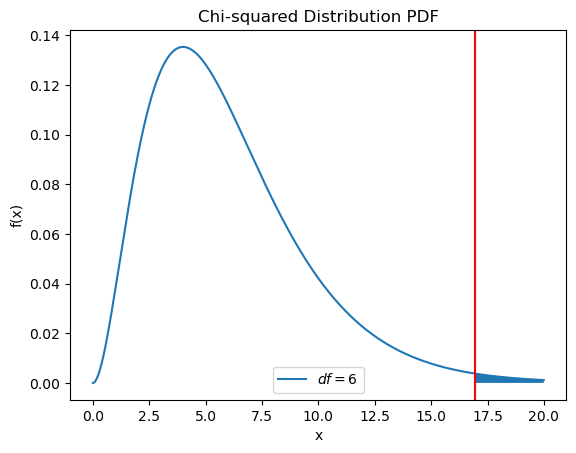

In [21]:
#Chi-squared Goodness of Fit Test

x = np.arange(0, 20, 0.01)
plt.plot(x, stats.chi2.pdf(x, df=6), label='$df=6$')
plt.axvline(chi_square_statistic, color='red')

x = np.arange(chi_square_statistic, 20, 0.01)
plt.fill_between(x, stats.chi2.pdf(x, df=6))

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Chi-squared Distribution PDF')
plt.legend()
plt.show()

In [22]:
# Calculate this actual probability using CDF

probability = 1 - stats.chi2.cdf(chi_square_statistic, df=shirts.shape[0]-1)
print("Probability: ", probability)

Probability:  0.009431379873720003


It appears that the probability of our data coming out the way it did given our model is quite low. A typical cutoff value is 0.05 (corresponding to a 5% probability). Since our probability is lower than 0.05, this suggests that our model is invalid. Specifically, it is not true that customers are indifferent between the different colors of shirts - they actually do have a preference for certain colors.

<a id='beta'></a>

## Beta Distribution

### Beta Distribution Overview

The Beta distribution is used frequently in statistics to model random variables whose range is in the interval $[0,1]$. It is often used to model a prior distribution for a proportion or percentage random variable.

### Beta Distribution PDF

A random variable X that follows a $Beta(r, s)$ distribution has the following probability density function (PDF):

$$
f(x) ~ = ~ \frac{\Gamma(r+s)}{\Gamma(r)*\Gamma(s)} x^{r-1}(1-x)^{s-1}, ~~~ 0 < x < 1
$$

Recall from earlier that for any positive integer input to the gamma function, $\Gamma(r) = (r-1)!$

### Beta Distribution Parameters

Both the r and s parameters are considered shape parameters because they both combine to affect the shape of the distribution. If r is larger than s, the distribution shifts closer to 1 while if s is larger than r the distribution shifts closer to 0. If r and s both increase, then the distribution gets narrower.

If we are using the Beta distribution as a prior distribution to model a proportion random variable, we would want to adjust r and s accordingly to match our expectation. If we expect the proportion to be high we would set r larger than s and vice-versa. We would also adjust the sum of r and s according to our confidence in this prior belief.

### Expectation and Variance

$$E[X] = \frac{r}{r+s}$$

$$Var(X) = \frac{rs}{(r+s)^2(r+s+1)}$$

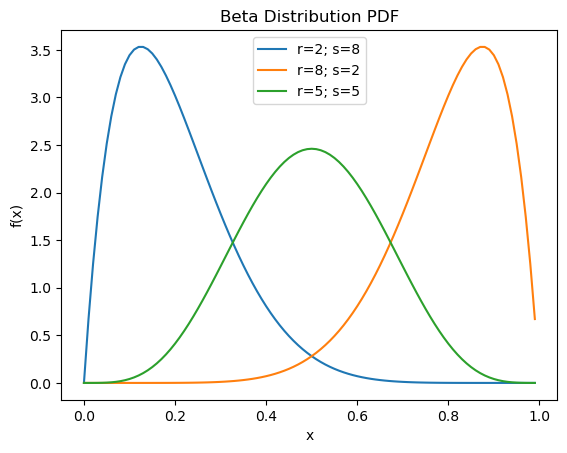

In [23]:
#Beta Distribution PDFs for different r values but constant r+s values

x = np.arange(0, 1, 0.01)
plt.plot(x, stats.beta.pdf(x, a=2, b=8), label='r=2; s=8')
plt.plot(x, stats.beta.pdf(x, a=8, b=2), label='r=8; s=2')
plt.plot(x, stats.beta.pdf(x, a=5, b=5), label='r=5; s=5')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Beta Distribution PDF')
plt.legend()
plt.show()

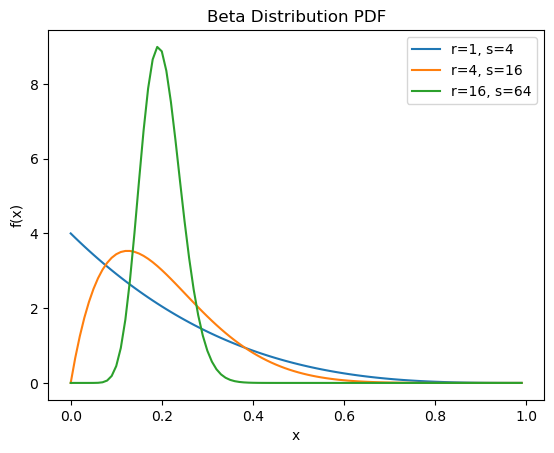

In [24]:
#Beta Distribution PDFs for different r+s values but constant r/(r+s) values

x = np.arange(0, 1, 0.01)
plt.plot(x, stats.beta.pdf(x, a=1, b=4), label='r=1, s=4')
plt.plot(x, stats.beta.pdf(x, a=2, b=8), label='r=4, s=16')
plt.plot(x, stats.beta.pdf(x, a=16, b=64), label='r=16, s=64')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Beta Distribution PDF')
plt.legend()
plt.show()

## Binomial Experiment with Beta Prior
Earlier we mentioned that the Beta distribution is frequently used as a prior distribution to model a proportion/percentage. We'll try to explore this further as it relates to a coin.

Let's say we have a coin and we want to figure out what the probability is that the coin lands on heads. Somebody tells us that the coin is a fair coin, but this person seems a little bit suspicious so we aren't sure if we should trust them. As a result, we take them at their word and assume the coin is fair, but with a low level of confidence. Thus, we choose our prior distribution to be $Beta(3, 3)$ to model this situation.

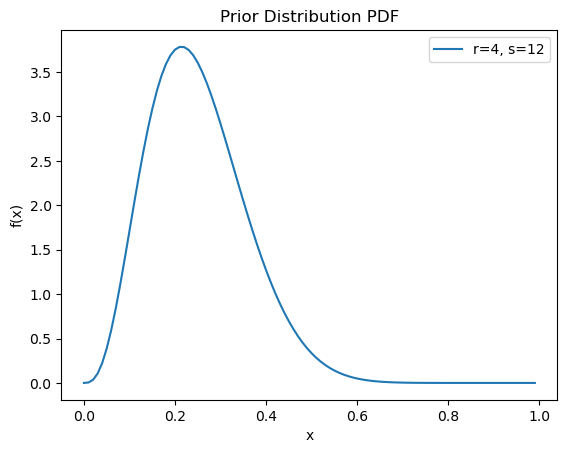

In [38]:
# Our Prior Beta Distribution
# Notice distibution is maximized near 0.5, but there is still some weight on the edges

# Set r and s according to expectation and level of confidence of prior.
r = 4
s = 12

x = np.arange(0, 1, 0.01)
plt.plot(x, stats.beta.pdf(x, a=r, b=s), label='r={}, s={}'.format(r, s))

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Prior Distribution PDF')
plt.legend()
plt.show()

To gain some more information about this coin, we flip the coin 10 times and see how many times it actually lands heads.

In [39]:
# Generate 10 random coin flips
num_flips = 10
coin_flips = np.random.binomial(n=1, p=0.5, size=10)
num_heads = sum(coin_flips)
print("Coin Flips: ", coin_flips)
print("Number of Heads: ", num_heads)
print("Number of Flips: ", num_flips)

Coin Flips:  [0 1 1 0 1 0 1 0 1 1]
Number of Heads:  6
Number of Flips:  10


Based on this data that we generated, we can adjust our distribution that models the coin. If our prior distribution was a $Beta(r,s)$ distribution, our posterior distribution will be a $Beta(r+k,s+n-k)$ distribution. Let's see what this looks like for us.

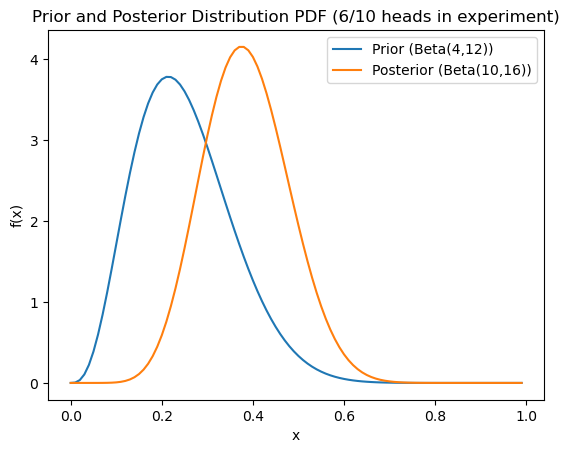

In [40]:
# Our Prior and Posterior Beta Distribution
# Notice the posterior distribution is much narrower than the prior distribution. 

x = np.arange(0, 1, 0.01)
plt.plot(x, stats.beta.pdf(x, a=r, b=s), label='Prior (Beta({},{}))'.format(r, s))
plt.plot(x, stats.beta.pdf(x, a=r+num_heads, b=s+num_flips-num_heads), 
                                         label='Posterior (Beta({},{}))'.format(r+num_heads, s+num_flips-num_heads))

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Prior and Posterior Distribution PDF ({}/{} heads in experiment)'.format(num_heads, num_flips))
plt.legend()
plt.show()

We can also adjust our prior to see how things would change if we had a different assumption to begin with.

<a id='conclusion'></a>
## Conclusion
Phew that was a lot of distributions! As a recap, we covered PDF, CDF, Normal Distribution, t-distribution, Poisson Process and its associated distributions (Poisson, Exponential, Erlang), Gamma, Chi-Square, and Beta Distributions. As you may have noticed, many of these distributions have connections with one another (i.e. Erlang is a subset of Gamma distributions). Overall, all these distributions serve to describe ways to model probabilistic events in the world, so the next time you face a situation with randomness, think about what distribution might best model it!